# Assignment 1
## Nitin Nandeshwar
## R00183235
## 04/04/2020

In [104]:
from zipfile import ZipFile
file_name='enron1.zip'

with ZipFile(file_name,'r') as unfold:
  unfold.extractall()
  print('Done')

Done


- Explanation: Using zipfile we can unzip all the folders in zip folder 

## List of Libraries 

In [0]:
# List of Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import re
import nltk 
from nltk.corpus import stopwords
import string
from sklearn.datasets import load_files
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
# Loading of data
emails = load_files("./enron1")
pd_form = {"texts": emails.data, "spam": emails.target}
df=pd.DataFrame(pd_form)
df.head(5)

,texts,spam
0,b'Subject: nesa / hea \' s 24 th annual meetin...,0
1,b'Subject: meter 1431 - nov 1999\r\ndaren -\r\...,0
2,"b""Subject: investor here .\r\nfrom : mr . rich...",1
3,"b""Subject: hi paliourg all available meds . av...",1
4,b'Subject: january nominations at shell deer p...,0


In [107]:
# Print the shape (Get the number of rows and columns)
df.shape

(5172, 2)

In [108]:
# Get the columns names
df.columns

Index(['texts', 'spam'], dtype='object')

In [0]:
# Data Cleaning
X_text = []

for email in range(0, len(df)):
    text=df.texts[email]

    # Remove special characters
    text = re.sub(r'\\r\\n', ' ', str(text))
    text = re.sub(r'\W', ' ', text)
    
    # Remove single characters from a letter
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text= re.sub(r'\^[a-zA-Z]\s+', ' ', text) 

    # Replaces multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    # Remove the 'b' that appears at the beginning
    text = re.sub(r'^b\s+', '', text)

    # Remove the digits from the emails
    text = re.sub("\d+", "", text)

    # Convert to lowercase
    text = text.lower()

    # Remove the word subject from email
    text = re.sub("subject", "", text)

    X_text.append(text)

In [110]:
# Print the first 5 text of emails
X_text[0:4]

[' nesa hea  th annual meeting saddle up for nesa hea  th annual meeting deep in the heart of texas september    hyatt regency hill country resort san antonio texas the annual meeting planning committee has put together an outstanding program for your review it is attached below in an adobe acrobat pdf file if you have problems with the attachment please call nesa hea headquarters at    and we ll mail or fax copy out immediately general session topics include will tomorrow restructured electric infrastructure support tomorrow economy power deregulation panel developer ipp utility transmission power marketer government retail power demand the state of the energy industry new political administration impact on energy policy and environment networking opportunities opening reception sunday september  golf tournament tours of area attractions monday september  the hyatt regency hill country resort has limited block of rooms available for nesa hea members and guests be sure to check page  f

In [0]:
df['texts']=X_text

In [112]:
# Print the shape (Get the number of rows and columns)
df.shape

(5172, 2)

In [0]:
# Check for duplicates and remove them
df.drop_duplicates(inplace=True)

In [114]:
# Print the shape after removing duplicates
df.shape

(4647, 2)

In [115]:
# show the number of missing (NAN.Nan,na) data for each column
df.isnull().sum()

texts    0
spam     0
dtype: int64

In [0]:
# Split the data into 70% training and 30% testing
X_train,X_test,y_train,y_test=train_test_split(df['texts'],df['spam'],test_size=0.30,random_state=0)

- Explanation: Setting the test_size as 0.30 ,we can split the dataset into 70% Train set and 30% Test set 

## Train Set

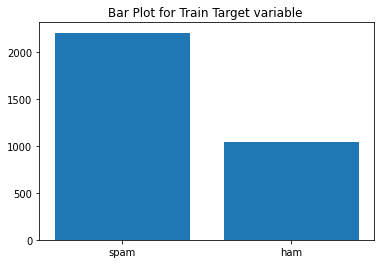

In [117]:
# Train Data verification - target distribution (balanced classes)
# Train Data target variable Barplot
plt.bar(Counter(y_train).keys(), Counter(y_train).values(),tick_label =('spam', 'ham'))
plt.title("Bar Plot for Train Target variable ")
plt.show;

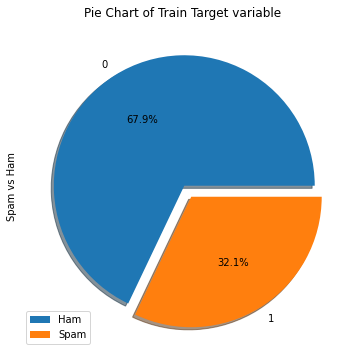

In [118]:
# Train Data target variable Pie chart
y_train.value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.title("Pie Chart of Train Target variable ")
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()


## Test Set



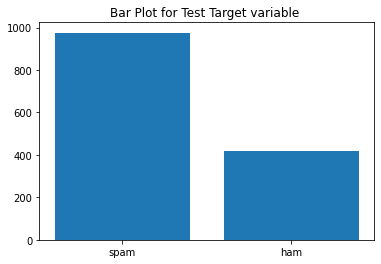

In [119]:
# Test Data verification - target distribution (balanced classes)
# Test Data target variable Barplot
plt.bar(Counter(y_test).keys(), Counter(y_test).values(),tick_label =('spam', 'ham'))
plt.title("Bar Plot for Test Target variable ")
plt.show;

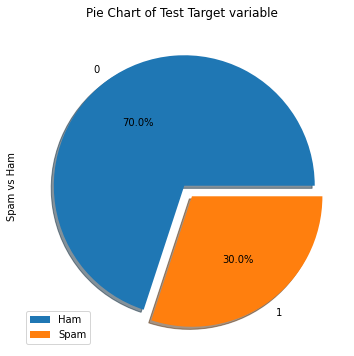

In [120]:
# Test Data target variable Pie Chart
y_test.value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.title("Pie Chart of Test Target variable ")
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

- Explanation:
As we can see that our distribution of train set and test set is similar as the ratio of spam and non-spam is 70:30 for both the set.So our sampled dataset is balanced.

In [121]:
# download the stopwords package
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
# Function for processing the email text
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

def process_text(text):
  
  # Removing punctuation
  nopunc=[char for char in text if char not in string.punctuation]
  nopunc=''.join(nopunc)
  
  # Removing stopwords
  clean_words = [stemmer.stem(word) for word in nopunc.split() if word.lower() not in stopwords.words("english")]
         
  # Returning the clean text
  return clean_words
 

In [123]:
# convert a collection of a text to a matrix of tokens
from sklearn.feature_extraction.text import TfidfVectorizer
X_train_features = TfidfVectorizer(encoding = "latin-1", strip_accents = "unicode", stop_words = "english",analyzer=process_text).fit_transform(df['texts'])
print(X_train_features.shape)

(4647, 37964)


In [124]:
# Get the shape of message_bow
X_train_features.shape

(4647, 37964)

In [0]:
# Split Train Data into spam and Ham
data_ham  = X_train[y_train == 0].copy()
data_spam = X_train[y_train == 1].copy()


In [0]:
# Data cleaning on Split Train data
data_ham = data_ham.apply(process_text)
words_data_ham = data_ham.tolist()
data_spam=data_spam.apply(process_text)
words_data_spam=data_spam.tolist()

In [0]:
# Generating List of Ham words
list_ham_words = []
for sublist in words_data_ham:
    for item in sublist:
        list_ham_words.append(item)

# Generating List of Spam words
list_spam_words=[]
for sublist in words_data_spam:
  for item in sublist:
    list_spam_words.append(item)

In [0]:
# Converting the words into counts 
c_ham  = Counter(list_ham_words)
c_spam = Counter(list_spam_words)
df_hamwords_top20  = pd.DataFrame(c_ham.most_common(20),  columns=['word', 'count'])
df_spamwords_top20 = pd.DataFrame(c_spam.most_common(20), columns=['word', 'count'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

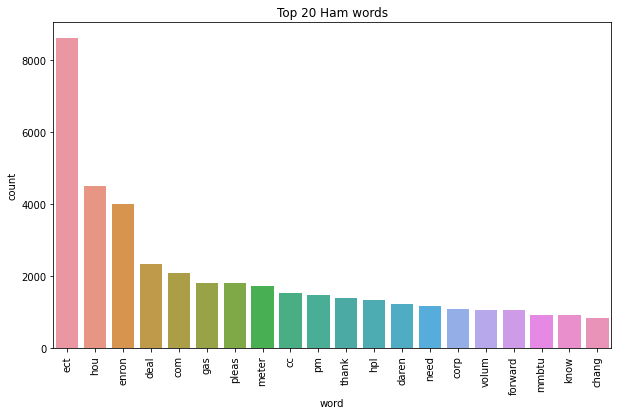

In [129]:
# Top 20 Ham words Barplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=df_hamwords_top20, ax=ax)
plt.title("Top 20 Ham words")
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

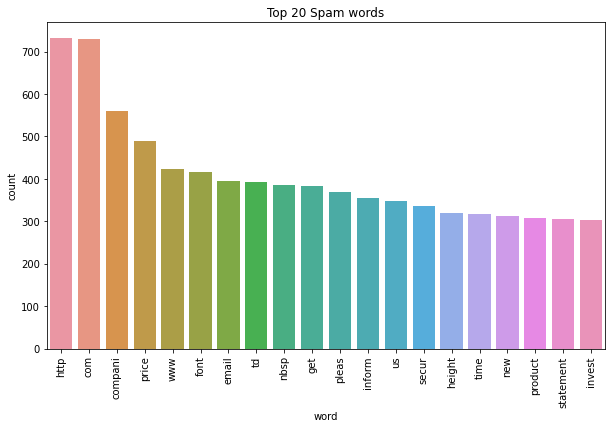

In [130]:
# Top 20 Spam words Barplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=df_spamwords_top20, ax=ax)
plt.title("Top 20 Spam words")
plt.xticks(rotation='vertical')

In [131]:
#Adding New Variable length 
X_train_length=X_train.apply(len)
X_train_length

4       1050
707      196
2258    2024
4694     861
2336     171
        ... 
1073     428
3557     302
1749     229
2813      89
2951    1903
Name: texts, Length: 3252, dtype: int64

# Distributions for Ham and Spam

[Text(0, 0.5, 'Length')]

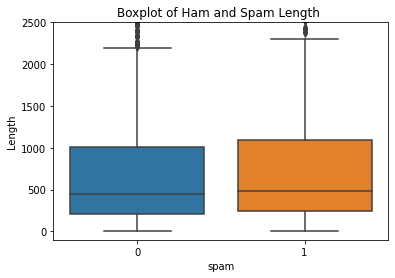

In [132]:
# Distribuion of length of Ham and Spam using Boxplot
ax=sns.boxplot(y=X_train_length, x=y_train)
plt.title("Boxplot of Ham and Spam Length ")
ax.set(ylim=(-100, 2500))
ax.set(ylabel='Length')


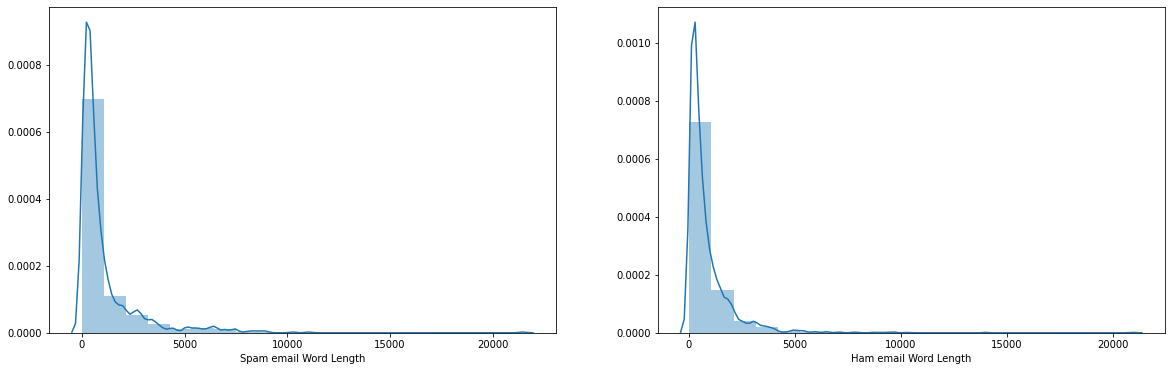

In [133]:
# Distribuion of length of Ham and Spam using distribution plot
f, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.distplot(X_train[y_train == 1].apply(len), bins = 20, ax = ax[0])
ax[0].set_xlabel("Spam email Word Length")

sns.distplot(X_train[y_train == 0].apply(len), bins = 20, ax = ax[1])
ax[1].set_xlabel("Ham email Word Length")

plt.show()

- **Explanation:** As the distribution of length of Spam and Ham email is nearly the same as median for both the boxplot is nearly the same but as there are a lot of outliers in spam compared to ham so spam is more skewed compared to ham. So we can say in the general length of  Spam email is longer compared to the length of the ham email.

# Training the Model

In [0]:
# Split the data into 70% training and 30% testing
X_train,X_test,y_train,y_test=train_test_split(X_train_features,df['spam'],test_size=0.30,random_state=0)

K Nearest Neighbors: 95.510524 (0.010033)
Decision Tree: 91.358943 (0.008879)
Logistic Regression: 97.908636 (0.005814)
Naive Bayes: 89.484096 (0.020179)


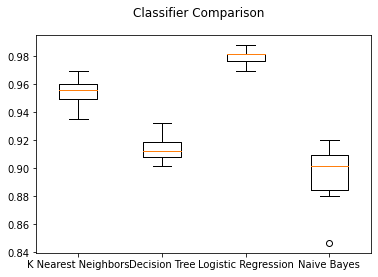

In [135]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score, recall_score
from sklearn import model_selection

names = ["K Nearest Neighbors","Decision Tree", "Logistic Regression","Naive Bayes"]

classifiers = [
    KNeighborsClassifier(n_neighbors=4,p=2),
    DecisionTreeClassifier(max_depth=12,criterion ='entropy'),
    LogisticRegression(penalty = 'l2', C = 1,random_state = 0,solver='lbfgs'),
    MultinomialNB(),
    ]

models = zip(names, classifiers)

# evaluate each model in turn
results = []

for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	msg = "%s: %f (%f)" % (name, (100 * cv_results.mean()), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Classifier Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

- **Explanation:**  
- KNeighbors Classifier: For Higher value of n_neighbour i.e n>4,we get good accuracy for manhattan_distance (p=1).Even for small value of n_neighbour i.e n =2 to 4  we get good accuracy for euliddean_distance (p=2).
- DecisionTree Classifier: For both gain as gini or entropy their is not much change in accuracy by varing the max_depth.As we increase the max_ depth above 12 the model become over-fitting model.
- LogisticRegression Classifier: For Ridge Regression (penality=l2),C=0.5 to 1,solver='lbfgs' we get best accuracy maximum accuracy=97.90% .For Lasso Regression (penality=l1),solver='liblinear' we get good accuracy for higher value to C i.e C=10 maximum accuracy=96.92%

# Model Selection

In [136]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score, recall_score

names = ["K Nearest Neighbors","Decision Tree", "Logistic Regression","Naive Bayes"]

classifiers = [
    KNeighborsClassifier(n_neighbors=4,p=2),
    DecisionTreeClassifier(max_depth=12,criterion ='entropy'),
    LogisticRegression(penalty = 'l2', C = 1,random_state = 0,solver='lbfgs'),
    MultinomialNB(),
    ]

models = zip(names, classifiers)

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    print("\n" + name + ":")
    print("Confusion Matrix:\n") 
    confusion_m = confusion_matrix(y_train, y_pred)
    print(confusion_m)
    print("Accuracy :{:.2f}%".format(100 *accuracy_score(y_train,y_pred)))
    print("Precision: {:.2f}%".format(100 * precision_score(y_train, y_pred)))
    print("Recall: {:.2f}%".format(100 * recall_score(y_train, y_pred)))


K Nearest Neighbors:
Confusion Matrix:

[[2196   13]
 [  43 1000]]
Accuracy :98.28%
Precision: 98.72%
Recall: 95.88%

Decision Tree:
Confusion Matrix:

[[2029  180]
 [   5 1038]]
Accuracy :94.31%
Precision: 85.22%
Recall: 99.52%

Logistic Regression:
Confusion Matrix:

[[2191   18]
 [   1 1042]]
Accuracy :99.42%
Precision: 98.30%
Recall: 99.90%

Naive Bayes:
Confusion Matrix:

[[2208    1]
 [ 147  896]]
Accuracy :95.45%
Precision: 99.89%
Recall: 85.91%


**Explanation:**
-	Based on Accuracy: Logistic Regression is best model having accuracy of 99.42% followed by K Nearest Neighbour.
-	Based on Precision: Multinominal Navive Bayes is best model having a precision of 99.89% followed by K Nearest Neighbour.
-	Based on Recall : Decision Tree is best model having Recall of 100% followed by Logistic Regression.

 As we can see Logistic Regression is best model for our Training dataset compared to other model based on model accuracy 

# Model Evaluation

In [137]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(penalty = 'l2', C = 0.5,random_state = 0).fit(X_train,y_train)
pred=classifier.predict(X_test)
print(classification_report(y_test,pred))
print()
print('Confusion Matrix :\n',confusion_matrix(y_test,pred))
print()
print("Accuracy :{:.2f}%".format(100 *accuracy_score(y_test,pred)))
print("Precision: {:.2f}%".format(100 * precision_score(y_test, pred)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, pred)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       976
           1       0.96      0.99      0.98       419

    accuracy                           0.98      1395
   macro avg       0.98      0.99      0.98      1395
weighted avg       0.99      0.98      0.99      1395


Confusion Matrix :
 [[959  17]
 [  4 415]]

Accuracy :98.49%
Precision: 96.06%
Recall: 99.05%


**Explanation**
-	We get an accuracy of 98.49% by correctly identifying the email as spam or ham i.e (959+415)/1395 
- Precision is 96.06 % i.e 415/(415+17) and 
-	Recall is 99.05% i.e 415/(415+4) 
-	We have only 1.5 % of Misclassified email as spam i.e (17+4)/1395


# ROC Curve

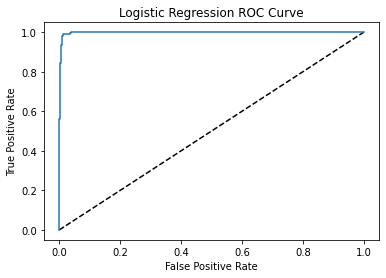

In [138]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
# predictive probalities for Logistic Regression
y_pred_prob=classifier.predict_proba(X_test)[:,1]
fpr, tpr,threshold = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [139]:
# calculate scores
lr_auc = roc_auc_score(y_test,y_pred_prob)
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Logistic: ROC AUC=0.998


**Explanation:**
- As we got ROC_AUC score near to 1 so our logistic regression shows good accuracy in predicting the probability of email as spam or ham
